<span style="color:#44f;font-weight:bold;">Codes for CNS2025: Lecture 6</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integrate-and-fire model

The neuron state is described by its membrane potential $V$ following the dynamics:

\begin{equation}
\tau_\mathrm{m}\frac{dV}{dt} = E_\mathrm{L}-V + R_\mathrm{m}I_e \tag{1}
\end{equation}

|Symbol|Variable|Description|
|:-|:-:|:-|
|$E_\mathrm{L}$|`el`|Resting potential (reversal potential of leakage current)|
|$R_\mathrm{m}$|`mr`|Membrane resistance|
|$\tau_\mathrm{m}$|`tm`|Membrane time constant|
|$V_\mathrm{th}$|`th`|Firing threshold|
|$V_\mathrm{reset}$|`vr`|Reset potential|
|$I_e$|`ie`|External input current|
|$V(0)$|`vi`|Initial membrane potential|
|$V$|`vm`|Membrane potential|
|$\Delta t$|`dt`|time between frames|

In [2]:
# Parameters of the model neuron
el = -70 # Resting potential (mV)
vr = -80 # Reset Potential (mV)
mr = 20  # Membrane resistance (MΩ)
th = -50 # Firing threshold (mV)
tm = 20  # Membrane time constant (ms)

# Parameters for the simulator
dt = 1   # Time step size (ms)

In [3]:
tt = 1000  # Simulate for 1s
ti = 0     # Time
# Traces
tis = []  # Time frames (ms)
vms = []  # Membrane potential (mV)
spt = []  # Spike train
ies = []  # Input current (μA)
ti = 0
vm = el
while ti<=tt:
    ie = 0 if ti<100 else 1.01 # A step input current
    dvt = (el-vm+mr*ie)/tm
    vm += dt*dvt
    ti += dt
    if sp:=vm>th: vm = vr # Check spiking
    tis.append(ti)
    vms.append(vm)
    spt.append(sp)
    ies.append(ie)
# Make numpy.array()s
tis,vms,spt,ies = np.array(tis),np.array(vms),np.array(spt),np.array(ies)

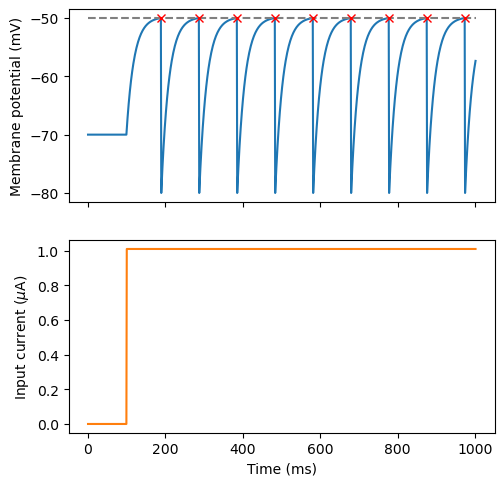

In [4]:
f,[a,b] = plt.subplots(2,1,sharex=True,figsize=(5.5,5.5))
a.plot(tis,vms,'-')
a.plot(tis,th*np.ones_like(tis),'--',color='gray')
a.plot(tis[spt>0],th*np.ones_like(tis[spt>0]),'rx')
a.set_ylabel("Membrane potential (mV)")
b.plot(tis,ies,color='C1')
b.set_ylabel(r"Input current ($\mu$A)")
b.set_xlabel("Time (ms)")
plt.show()

## Functionalize the code

### Integrators

In [5]:
def euler_step(y,f,dt):
    dyt = f(y)
    y += dt*dyt
    return y

In [6]:
def runge_kutta(y,f,dt):
    k1 = f(y)
    k2 = f(y+k1*dt/2)
    k3 = f(y+k2*dt/2)
    k4 = f(y+k3*dt)
    y += dt*(k1+2*(k2+k3)+k4)/6
    return y

In [7]:
def integrate_fire_traces(tt,dt,vi=el,ies=None,itg=euler_step):
    '''Solve integrate-and-fire model for traces

    Parameters
    ----------
     tt :  Simulated time duration
     dt :  Time step size
     vi :  Initial membrane potential
    ies :  Input current trace

    Return
    ------
    tis :  Time frames
    vms :  Membrane potential trace
    spt :  Spike train
    '''
    nf = int(tt/dt)
    if ies is None: ies = np.zeros(nf)
    ti = 0
    vm = vi
    # Traces
    tis = []   # Time frames
    vms = []   # Membrane potential
    spt = []   # Spike train
    for i in range(nf):
        ie = ies[i%len(ies)]
        vm = itg(vm,lambda x:(el-x+mr*ie)/tm,dt)
        if sp:=vm>th: vm = vr
        ti += dt
        tis.append(ti)
        vms.append(vm)
        spt.append(sp)
    return np.array(tis),np.array(vms),np.array(spt) 

## Compare Euler and RK4

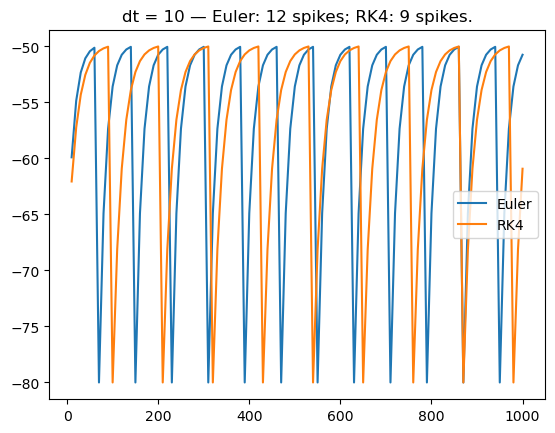

In [8]:
dt = 10
tis,vms,spt = integrate_fire_traces(1000,dt,ies=[1.01])
plt.plot(tis,vms,label='Euler')
nif = spt.sum()
tis,vms,spt = integrate_fire_traces(1000,dt,ies=[1.01],itg=runge_kutta)
plt.plot(tis,vms,label='RK4')
nrk = spt.sum()
plt.title(f'dt = {dt} — Euler: {nif} spikes; RK4: {nrk} spikes.')
plt.legend()
plt.show()

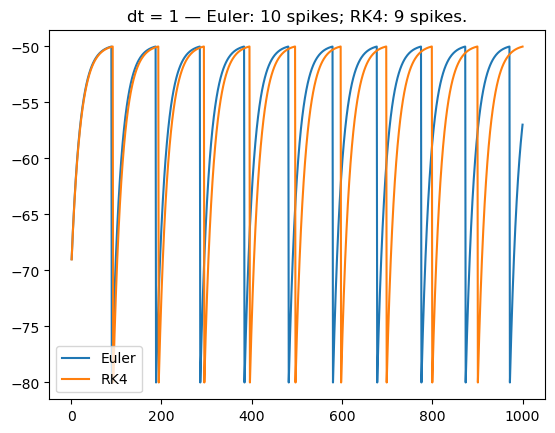

In [9]:
dt = 1
tis,vms,spt = integrate_fire_traces(1000,1,ies=[1.01])
plt.plot(tis,vms,label='Euler')
nif = spt.sum()
tis,vms,spt = integrate_fire_traces(1000,1,ies=[1.01],itg=runge_kutta)
plt.plot(tis,vms,label='RK4')
nrk = spt.sum()
plt.title(f'dt = {dt} — Euler: {nif} spikes; RK4: {nrk} spikes.')
plt.legend()
plt.show()

Very long calculation to see how firing rate depends on the amplitude of input current.

In [10]:
T = 100000
ies = np.arange(0.7,4,0.01)
mus1 = [integrate_fire_traces(T,1,ies=[i])[2].sum()/T for i in ies]
mus2 = [integrate_fire_traces(T,0.25,ies=[i])[2].sum()/T for i in ies]

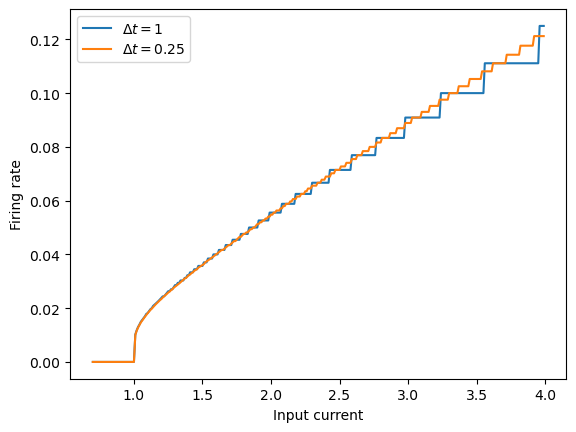

In [11]:
plt.plot(ies,mus1,label=r'$\Delta t=1$')
plt.plot(ies,mus2,label=r'$\Delta t=0.25$')
plt.xlabel('Input current')
plt.ylabel('Firing rate')
plt.legend()
plt.show()

The <q>steping</q> artifect can be diminished with finer time steps.

## FitzHugh–Nagumo model
\begin{align*}
\frac{dv}{dt} & = v-\frac{v^3}{3}-w+R I_\mathrm{ext} \\
\tau\frac{dw}{dt} & = v+a-b w
\end{align*}

|Symbol|Variable|Description|
|:-|:-:|:-|
|$R$|`mr`|Membrane resistance|
|$I_\mathrm{ext}$|`ie`|External current|
|$a$|`fa`|Parameter $a$|
|$b$|`fb`|Parameter $b$|
|$\tau$|`tw`|Slow time scale|

In [12]:
mr = 5      # Membrane resistance
ie = 0      # External current
fa = 0.66   # Parameter a
fb = 0.5    # Parameter b
tw = 10     # Slow time scale

In [13]:
def fhn_slope(y):
    '''Get time-derivative of FitzHugh–Nagumo model given the state [v,w]

    Parameters
    ----------
    y :   [v,w] or v = y[0], w = y[1]

    Returns
    -------
    dy/dt
    '''
    return np.array([
        y[0]-y[0]**3/3-y[1]+mr*ie,
        (y[0]+fa-fb*y[1])/tw
    ])

In [14]:
def get_traces(tt,dt,yi,ies=None,slope=fhn_slope,itg=euler_step):
    global ie
    nf = int(tt/dt)
    if ies is None: ies = np.zeros(nf)
    elif type(ies)==float or type(ies)==int: ies = np.zeros(nf)+ies
    ti = 0
    y = yi
    # Traces
    tis = []   # Time frames
    ys = []    # Traces
    for i in range(nf):
        ie = ies[i%len(ies)]
        y = itg(y,slope,dt) # Integrate
        ti += dt
        tis.append(ti)
        ys.append(y.copy())
    return np.array(tis),np.array(ys)

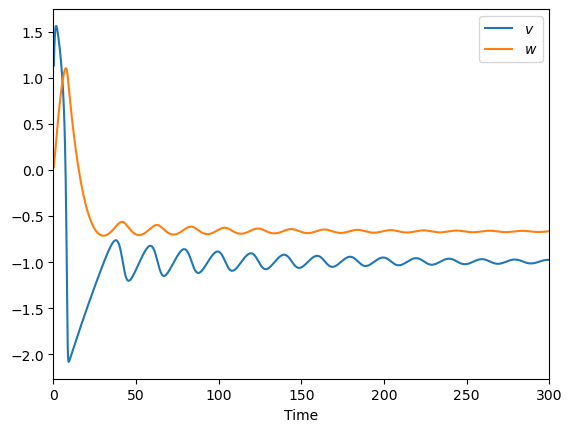

In [15]:
ts,ys = get_traces(300.0,0.2,np.array([1.,0.]))
plt.plot(ts,ys[:,0],label='$v$')
plt.plot(ts,ys[:,1],label='$w$')
plt.xlim(0,300)
plt.xlabel('Time')
plt.legend()
plt.show()

In [16]:
vr = np.linspace(-2.5,2.5)
wr = np.linspace(-3,3)

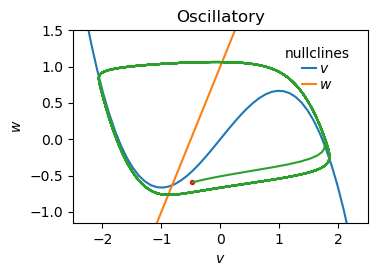

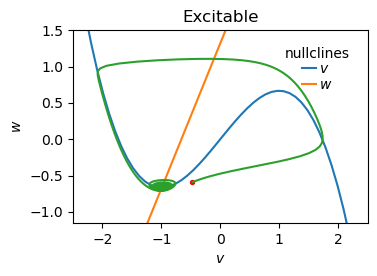

In [17]:
for fa,ti in [
    (0.5,'Oscillatory'),
    (0.66,'Excitable')
]:
    ts,ys = get_traces(300.0,0.2,np.array([-.5,-0.6]))
    plt.figure(figsize=(3.8,2.5))
    plt.title(ti)
    plt.plot(vr,vr-vr**3/3,label='$v$') # v-nullcline
    plt.plot(fb*wr-fa,wr,label='$w$') # w-nullcline
    plt.plot(ys[:,0],ys[:,1],'-')
    plt.scatter(ys[:1,0],ys[:1,1],s=8,color='#f00')
    plt.xlim(-2.5,2.5)
    plt.ylim(-1.15,1.5)
    plt.xlabel('$v$')
    plt.ylabel('$w$')
    plt.legend(title='nullclines',frameon=False,labelspacing=0.125,loc=[.7,.65],handlelength=1,handletextpad=.25)
    plt.show()

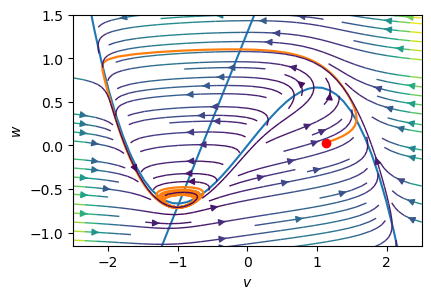

In [18]:
fa = 0.65
ts,ys = get_traces(300.0,0.2,np.array([1.,0.]))
ws,vs = np.mgrid[-1.5:1.5:100j,-2.5:2.5:100j]
[vv,ww] = fhn_slope([vs,ws])

plt.figure(figsize=(4.5,3))
plt.plot(vr,vr-vr**3/3,color='C0')
plt.plot(fb*wr-fa,wr)
plt.plot(ys[:,0],ys[:,1],'-',lw=1.6)
plt.plot(ys[:1,0],ys[:1,1],'ro')
plt.streamplot(vs,ws,vv,ww,color=np.sqrt(vv**2+ww**2),linewidth=1)
plt.xlim(-2.5,2.5)
plt.ylim(-1.15,1.5)
plt.xlabel('$v$')
plt.ylabel('$w$')
plt.show()

In [19]:
fa = 0.5

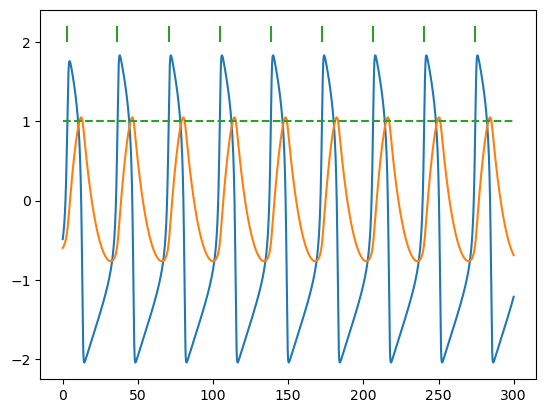

In [20]:
# Warm-up
ts,ys = get_traces(300.0,0.1,np.array([-.5,-.6]))
plt.plot(ts,ys)
plt.plot([ts[0],ts[-1]],[1,1],'--')
plt.vlines(ts[np.where((ys[:-1,0]<=1)*(ys[1:,0]>1))],2,2.2,color='C2')
plt.show()

In [21]:
# Long run for better accuracy
ts,ys = get_traces(10000.0,0.1,np.array(ys[-1]))
spks = ts[np.where((ys[:-1,0]<1)*(ys[1:,0]>1))] # Spike times

In [22]:
freq = (len(spks)-1)/(spks[-1]-spks[0]) if len(spks)>1 else 0
print(f'The firing frequency is {freq} Hz')

The firing frequency is 0.029415898640588807 Hz


<hr>
<address style="color:#44f;font-style:italic;font-weight:bold;"><a href="https://cc.tir.tw/wk/2025cns">CNS2025</a></address>